In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df = pd.read_excel('DengueData2022.xlsx')

In [85]:
df.head()

,Day,Affected
0,1,9
1,2,19
2,3,16
3,4,13
4,5,14


In [86]:
df.describe()

,Day,Affected
count,152.000000,152.000000
mean,76.500000,175.769737
std,44.022721,177.431844
min,1.000000,4.000000
25%,38.750000,34.750000
50%,76.500000,79.000000
75%,114.250000,296.000000
max,152.000000,618.000000


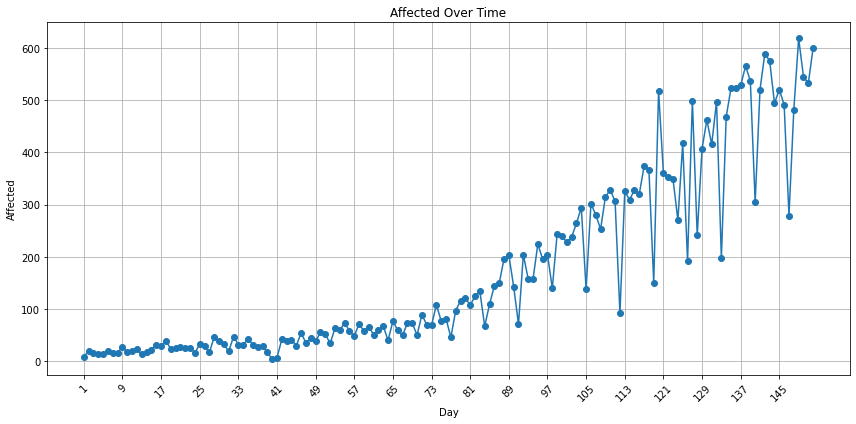

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Affected'], marker='o', linestyle='-')
plt.title('Affected Over Time')
plt.xlabel('Day')
plt.ylabel('Affected')
x_ticks = df['Day'][::8]  
plt.xticks(x_ticks, rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
import pandas as pd
n = 7  
df['Rolling Mean'] = df['Affected'].rolling(window=n).mean()
df['Rolling SD'] = df['Affected'].rolling(window=n).std()
print(df)


     Day  Affected  Rolling Mean  Rolling SD
0      1         9           NaN         NaN
1      2        19           NaN         NaN
2      3        16           NaN         NaN
3      4        13           NaN         NaN
4      5        14           NaN         NaN
..   ...       ...           ...         ...
147  148       481    489.857143  102.098692
148  149       618    494.000000  107.250486
149  150       545    489.714286  104.025180
150  151       532    495.142857  105.270174
151  152       600    506.571429  112.512010

[152 rows x 4 columns]


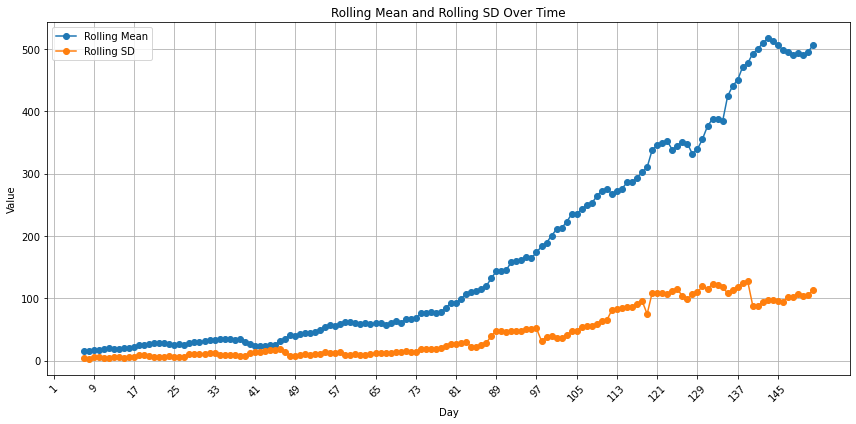

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Rolling Mean'], label='Rolling Mean', marker='o')
plt.plot(df['Day'], df['Rolling SD'], label='Rolling SD', marker='o')

plt.title('Rolling Mean and Rolling SD Over Time')
plt.xlabel('Day')
plt.ylabel('Value')
x_ticks = df['Day'][::8]  
plt.xticks(x_ticks, rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [91]:

value_column = 'Affected'


In [92]:
df.head()

,Day,Affected,Rolling Mean,Rolling SD
0,1,9,NaN,NaN
1,2,19,NaN,NaN
2,3,16,NaN,NaN
3,4,13,NaN,NaN
4,5,14,NaN,NaN


In [93]:
decomposition = seasonal_decompose(df[value_column], model='additive', period=7)

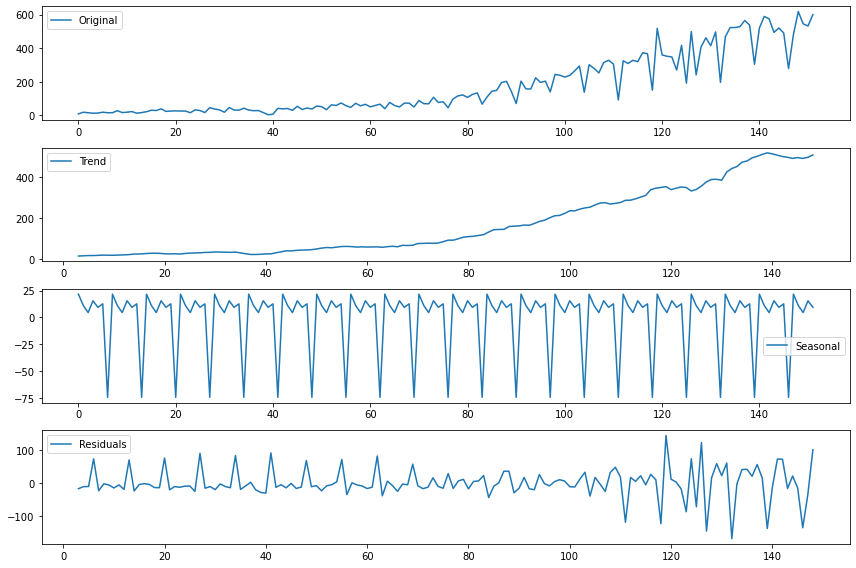

In [94]:
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(df[value_column], label='Original')
plt.legend(loc='best')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [1]:
import pytesseract
import cv2
import pandas as pd

# Load the image
image = cv2.imread('img.png')

# Extract text using OCR (Tesseract)
text = pytesseract.image_to_string(image)

# Convert the text to a list of lines
lines = text.split('\n')

# Create a Pandas DataFrame from the lines
df = pd.DataFrame([line.split() for line in lines])

# Export to CSV
df.to_csv('output.csv', index=False, header=False)


ModuleNotFoundError: No module named 'pytesseract'

In [95]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df[value_column])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: 3.3051234612747638
p-value: 1.0
Critical Values:
   1%: -3.479007355368944
   5%: -2.8828782366015093
   10%: -2.5781488587564603


In [96]:
from pandas.plotting import lag_plot

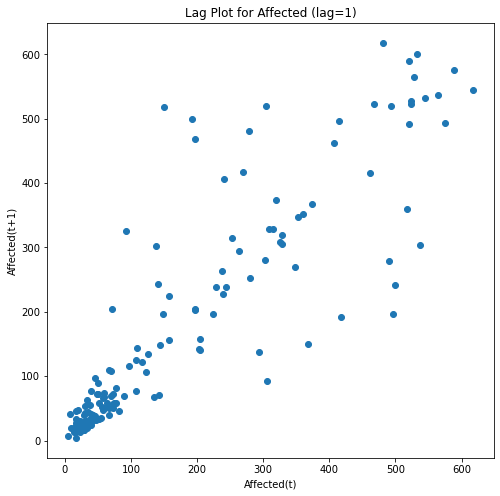

In [98]:
plt.figure(figsize=(8, 8))
lag_plot(df[value_column], lag=1)  
plt.title(f'Lag Plot for {value_column} (lag=1)')
plt.xlabel(f'{value_column}(t)')
plt.ylabel(f'{value_column}(t+1)')
plt.show()